In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train=pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test=pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [3]:
train.shape,test.shape

((1296675, 23), (555719, 23))

In [4]:
df=pd.concat([train,test])

In [5]:
df.shape

(1852394, 23)

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['trans_date_trans_time']

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                 ...         
555714    2020-12-31 23:59:07
555715    2020-12-31 23:59:09
555716    2020-12-31 23:59:15
555717    2020-12-31 23:59:24
555718    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [10]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

In [11]:
df['trans_date_trans_time'].dt.year

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
555714    2020
555715    2020
555716    2020
555717    2020
555718    2020
Name: trans_date_trans_time, Length: 1852394, dtype: int64

In [12]:
df['hour']=df['trans_date_trans_time'].dt.hour
df['day']=df['trans_date_trans_time'].dt.day
df['month']=df['trans_date_trans_time'].dt.month

In [13]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1


In [14]:
'''
Lets remove the unnecessary columns
'''
df.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first', 'last', 
             'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1,inplace=True)

In [15]:
df.head()

,cc_num,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,1,1
1,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,1,1
2,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1,1
3,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,0,1,1
4,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,0,1,1


In [16]:
len(df['category'].unique())

14

In [17]:
for i,cat in enumerate(df['category'].unique()):
    df['category'].replace({cat:i},inplace=True)

In [18]:
df.head()

,cc_num,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,2703186189652095,0,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,1,1
1,630423337322,1,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,1,1
2,38859492057661,2,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1,1
3,3534093764340240,3,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,0,1,1
4,375534208663984,4,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,0,1,1


In [19]:
df['gender'].replace({'M':0,'F':1},inplace=True)

# EDA

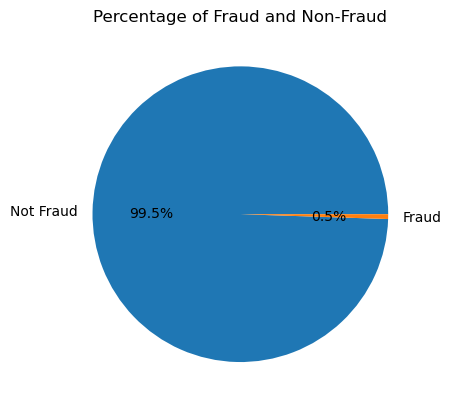

In [20]:
plt.pie(df['is_fraud'].value_counts(),labels=['Not Fraud','Fraud'],autopct="%.1f%%")
plt.title('Percentage of Fraud and Non-Fraud')
plt.show()

### As we clearly see that dataset is highly imbalanced

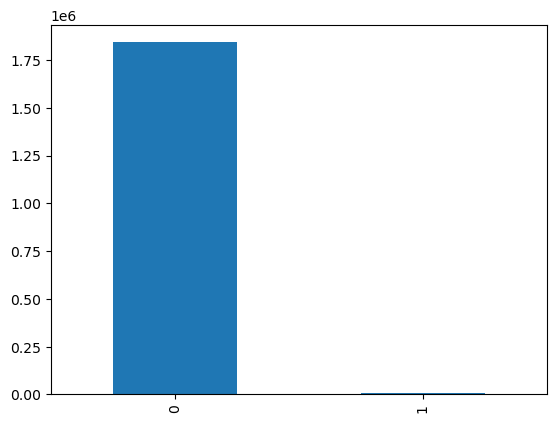

In [21]:
df['is_fraud'].value_counts().plot(kind='bar')
plt.show()

In [22]:
df['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

## Methods:  We will do oversampling here because if we do downsampling here then we will lose huge bulk of data

In [23]:
fraud_by_gender=df.groupby('gender')['is_fraud'].size()

In [24]:
fraud_by_gender

gender
0     837645
1    1014749
Name: is_fraud, dtype: int64

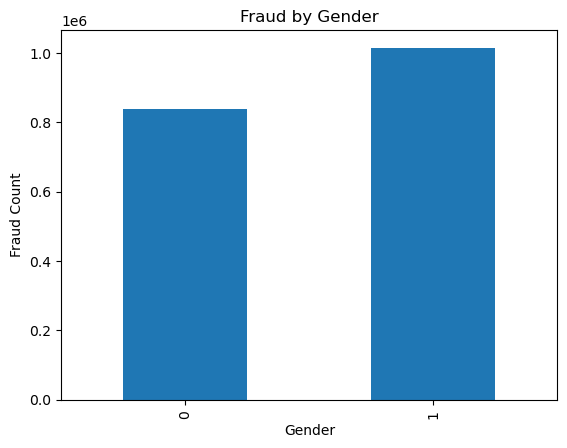

In [25]:
fraud_by_gender.plot(kind='bar')
plt.title('Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Count')
plt.show()

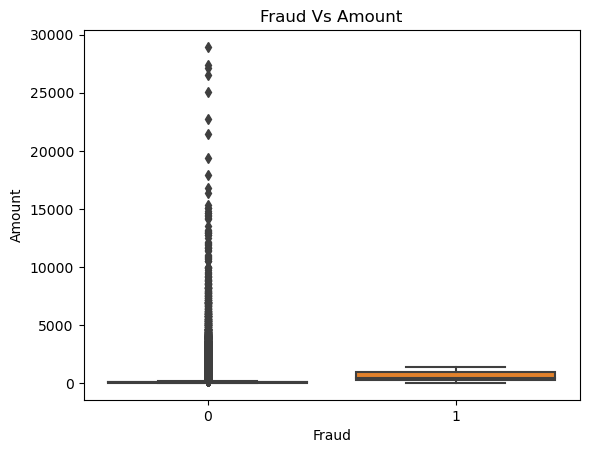

In [26]:
sns.boxplot(x='is_fraud',y='amt',data=df)
plt.title('Fraud Vs Amount')
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.show()

In [27]:
df[df['is_fraud']==1]['amt'].describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

## Data Manipulation

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
x=df.drop(['is_fraud'],axis=1)
y=df['is_fraud']

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [32]:
cols=['cc_num','amt','lat','long','city_pop','unix_time','merch_lat','merch_long']
x[cols]=scaler.fit_transform(x[cols])

In [33]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
x_res, y_res = smote.fit_resample(x, y)

<Axes: >

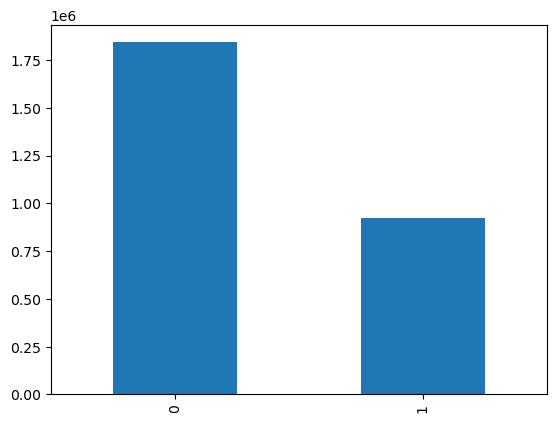

In [34]:
y_res.value_counts().plot(kind='bar')

### Now we are good to go

# Model Development

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,train_size=0.9,random_state=42)

### Importing the algorithms

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier 

In [39]:
knc = KNeighborsClassifier(n_jobs=-1)
lr = LogisticRegression(solver='liblinear', penalty='l1',n_jobs=-1)
rfc = RandomForestClassifier(n_estimators=50, random_state=2,n_jobs=-1)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2,n_jobs=-1)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [42]:
knc.fit(x_train,y_train)
lr.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


LogisticRegression(n_jobs=-1, penalty='l1', solver='liblinear')

In [43]:
rfc.fit(x_train,y_train)
abc.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [44]:
knc_predict=knc.predict(x_test)
lr_predict=lr.predict(x_test)
rfc_predict=rfc.predict(x_test)
abc_predict=abc.predict(x_test)
xgb_predict=xgb.predict(x_test)

In [46]:
print(f'Name: KNC,  Accuracy: {accuracy_score(y_test,knc_predict)},Precision: {precision_score(y_test,knc_predict)}')
print(f'Name: LR,  Accuracy: {accuracy_score(y_test,lr_predict)},Precision: {precision_score(y_test,lr_predict)}')
print(f'Name: RFC,  Accuracy: {accuracy_score(y_test,rfc_predict)},Precision: {precision_score(y_test,rfc_predict)}')
print(f'Name: ABC,  Accuracy: {accuracy_score(y_test,abc_predict)},Precision: {precision_score(y_test,abc_predict)}')
print(f'Name: XGB,  Accuracy: {accuracy_score(y_test,xgb_predict)},Precision: {precision_score(y_test,xgb_predict)}')

Name: KNC,  Accuracy: 0.9877139921566358,Precision: 0.9649062428300273
Name: LR,  Accuracy: 0.8911407608931595,Precision: 0.944974781295415
Name: RFC,  Accuracy: 0.9986722718261146,Precision: 0.9977968096940374
Name: ABC,  Accuracy: 0.940082196141991,Precision: 0.9308897911043571
Name: XGB,  Accuracy: 0.9850910959003227,Precision: 0.9845056378001074


### Remarks:  Random Forest has performed well so we can choose that

In [47]:
print(f'Name: RFC,  Accuracy: {accuracy_score(y_test,rfc_predict)},Precision: {precision_score(y_test,rfc_predict)}')

Name: RFC,  Accuracy: 0.9986722718261146,Precision: 0.9977968096940374
